### Fundamentals of Constrained Optimization
Constrained optimization has a lot more real-life utility viz. a viz. unconstrained optimization given most of the real values will have some or the other constraint associated with them. We will look a couple of examples and try to understand the physical significance of the methods being used here. 
<br>Remember we had solved the problem of unconstrained optimizations using the Hessian Matrix, here we will get something similar. However, the methodology at arriving the optimal might be a bit different. 
<br>However, what we should be aware of is that the fundamental method of finding optimum:
1. Find the critical point (where the first derivative of the function becomes Zero)
2. Find the direction in which the function is changing at the points in vicinity of the critical point
3. If the function is increasing from here (Second Derivative is > 0) means this is a minima. If the function is decreasing in the vicinity (Second Derivative is < 0) means it is a maximia. 

<br>Will always stay unchanged, given this is the fundamental intuition behind the entire process of finding the optimal solution. 

<br>One more thing that doesn't change is the *Quadratic Approximation* which again has a fundamental rationale:
1. The function in vicinity of the critical point is very very close after 3$^{rd}$ derivative and thus we can ignore higher than 2$^{nd}$ order derivative terms
2. 2$^{nd}$ order derivative forms a paraboloid which has a definitive minima/ maxima and therefore is more mathematically tractable.

<br>Let us start looking at the constraint optimization starting with an example.

---
Say our function is $2x^2 + y^2$ subject to constrain $2x + 3y + 4 = 0$. This can be represented as a graph below. 
<br>Now we don't have the absolute minima of the function available however a cut-off region for minimization let us see how we solve this problem using Lagrange multipliers. 

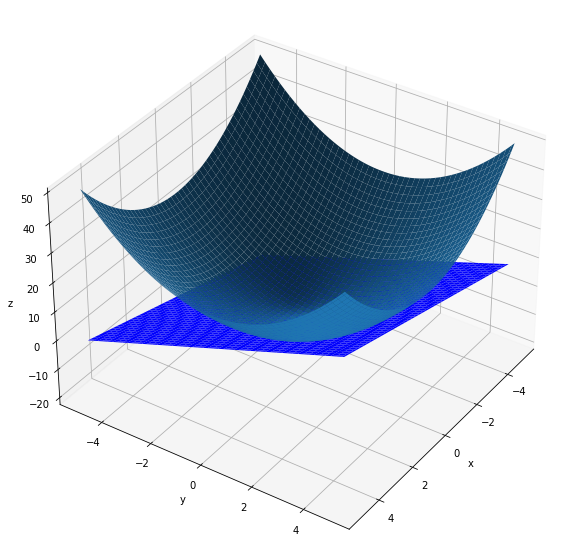

In [1]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

def d(x,y):
    return 2*x + 3*y + 4
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,  edgecolor='none',alpha = 1);
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z = d(X,Y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, edgecolor='none',color= 'blue',alpha = 1);

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(35,34)


In [2]:
# !pip install plotly sympy
# !pip install numpy
# !pip install pandas
# !pip install matplotlib

In [3]:
#PLOT 1
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),2*(x**2) + y**2)
plane = sp.lambdify((x,y),2*x+3*y+4)
plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.arange(-5,5,0.1)
x,y = np.meshgrid(points,points)

points2 = np.arange(-5,5,0.1)
x2,y2 = np.meshgrid(points2,points2)
import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = paraboloid(x,y)),go.Surface(z = 5+0*plane2(x2,y2))])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.show()

As we can see our plane is cutting through the paraboloid and therefore the absolute minima of the paraboloid is not available. 
<br>

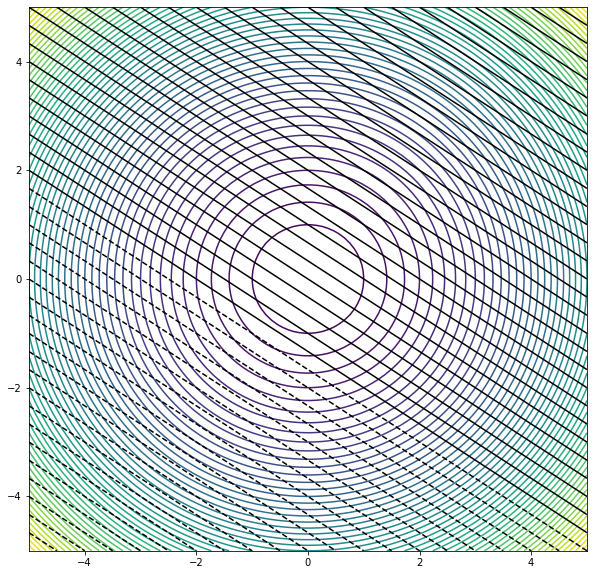

In [5]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

def d(x,y):
    return 2*x + 3*y + 4
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
#ax = plt.axes(projection='3d')
plt.contour(X, Y, Z,50,  alpha = 1);
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
Z = d(X,Y)
plt.contour(X, Y, Z,50, colors= 'black',alpha = 1);
#print(x)

In the contour plot above the dashed lines are below the paraboloid and the solid black lines are above, we can clearly see the intersection here as well. 

---
Now that we have the visual intuition of the problem we can move and try to arrive at an optimal solution of this problem. Let us try to understand the framework for the solution. 

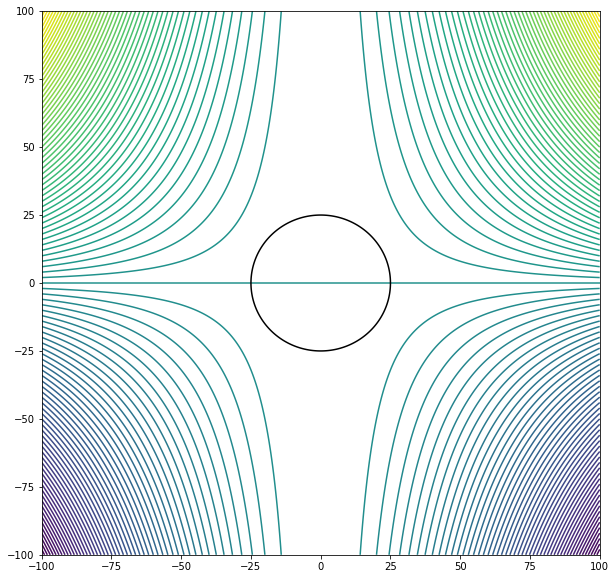

In [5]:
##THIS IS OUR CORE FUNCTION WHICH WE WILL CHANGE 
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return (x**2)*y

x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

def d(x,y):
    return (x**2) + y**2
#THIS IS USED FOR PLOTTING THE GRAPH
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
#ax = plt.axes(projection='3d')
plt.contour(X, Y, Z, 100, alpha = 1);
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
X,Y = np.meshgrid(x,y)
Z = d(X,Y)
plt.contour(X, Y, Z ,levels = np.array([625]),colors= 'black',alpha = 1);

Let us try to solve the problem of constrained optimization and understand the intuition behind the same.
<br>Say our function f(x,y) = $x^2$y is to be optimized 
<br>Given a constraint - $x^2 + y^2 = 1$

<br>Let us take a real-life example:
<br>Say we are producing a steel product which is a function of labor and steel usage. One widget yields 100 Rs as revenue. The quantity for a widget is given as $h^{\frac{2}{3}}s^{\frac{1}{3}}$. 
<br>So our function revenue becomes f(x,y) = 100$h^{\frac{2}{3}}s^{\frac{1}{3}}$
<br>Cost function for one unit of labor is 20 Rs/ hour and 2000 Rs/ hour for steel. 
<br>Our total budget is 20,000 Rs 


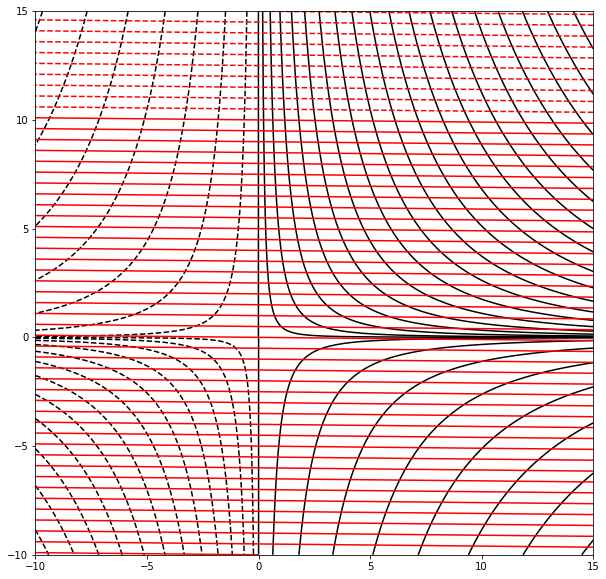

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
h = np.linspace(-10,15,1000,dtype = complex)
s = np.linspace(-10,15,1000,dtype = complex)
def f(h,s):
    return 100*(h**(2/3))*(s**(1/3))
H,S = np.meshgrid(h,s)
Z = f(H,S)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.contour(H,S,np.real(Z),40,alpha=1,colors = 'black');

def d(h,s):
    return 20000-20*h - 2000*s
H,S = np.meshgrid(h,s)
Z = d(H,S)
plt.contour(H,S,np.real(Z),50,alpha=1,colors = 'red')
plt.show()

Let us visualize the same function in 3-D to understand what it exactly looks like. 
<br>Remember we don't need all this plotting to solve the optimization problem they can be pretty easily solved. We are doing this so we can understand the basic intuition behind the whole solving process. 

In [6]:
import sympy as sp
x,y = sp.symbols('x y')
paraboloid = sp.lambdify((x,y),100*(x+0j)**(2/3)*(y+0j)**(1/3))
plane = sp.lambdify((x,y),20000 - 20*x - 2000*y)
#plane2 = sp.lambdify((x,y),x+y)
import numpy as np
points = np.linspace(-10,15,100,dtype = complex)
x,y = np.meshgrid(points,points)

import plotly.graph_objects as go
fig = go.Figure(data = [go.Surface(z = np.real(paraboloid(x,y))),go.Surface(z = np.real(plane(x,y)))])
fig.show()

In order to appreciate the real shape of the plot of our function you can try-out the below code. The graph looks some what like this:
<img src="Plot of Graph.png" width="600">
<br>Ok, enough of playing with the graphs now let us get to the solving of the optimization problem. 
<br>At the optimum point the contour lines of the function is going to be tangent to the contour lines of the constraint function. Remember here the constraint function is a plane and the function is a some sort of a 3-D graph. 
<br>*Why should the contour lines be tangent at the point of optimization?* 
<br>Well, the answer to this can be arrived at via thinking if they are not tangent there is still a possibility of improvement in the function value without actually breaching the constraint conditions. 
<br>While the above functions seem to be intersecting. However, remember we have only one function $x^{\frac{2}{3}}y^{\frac{1}{3}}$ and other one is a constraint 20000 = 20x + 2000y. 
<br>If we have to take a graphical approach we are allowed to move only on the graph of the function while not breaching constraints of 20x+2000y = 20000 (which is a plane in 3-D, but will become a shadow of this plane on the given function). 
<br>At the point of optimality the the constraint curve (a line projected upon the function) and the function under consideration have same slope. Which means 
<center>$\nabla f(x,y) = \lambda \nabla constraint$</center>

---
Let us try to understand what exactly this formula means. Let us recap first we have a function which is a 3-D surface and then there is an equation of a line which when projected on the surface we have to find optimum value for these two intersections. 
<br>Now if we look at the contour lines these two surfaces should be touching each other and for that to happen the gradient of both of the curves should be equal. Therefore the result
<br> <center>$\nabla f(x,y) = \nabla constraint$</center>
<br>Let me try and explain this via a picture:
<img src="Optimization_Constraint.png" width="600">
<br>Here our function is the curve in purple and our constraint is a line (this line would be straight in X-Y Plane. However, becomes curved when projected on the curve.) Now our optimization problem becomes instead of finding local minima or maxima but finding maxima or minima at points where the line is being projected on the curve. 
<br>Second point to understand here is that at all points (apart from one) the gradient of the curve and the projected line is in different direction. (Look at the blue contour lines) another way to see it is the contour line will be touching the contour line (Blue Circles and Red Line) intersect each other but touch at only one point. This is the fundamental premise of the constrained optimization. Therefore we use the result:

<br> <center> $\nabla f(x,y) = \lambda \nabla constraint$</center>
<br>Why lambda, the reason to use lambda is that though the gradient of the contours are in the same direction. However, their magnitude may be different. Remember we are interested in the direction of gradient and not in the magnitude. At the below mentioned points we can see the direction of the gradients are same but their magnitude may vary we will come to the physical significance of $\lambda$ soon. 
<img src="Lagrange Multiplier.png" width="600">

Now let us try to solve the problem we started off with:
<br> f(x,y) = $x^{2}y$
<br>Our constraint is $x^2 + y^2 = 1$
- Our step 1 will be write the equation $\nabla f(x,y) = \lambda \nabla(x^2 + y^2 -1)$
- $\nabla (x^2 + y^2 - 1) = \begin{bmatrix} 2xy \\ 2y  \end{bmatrix}$, in the matrix form and
- $\nabla f(x,y) = \begin{bmatrix} 2x \\ x^2\end{bmatrix}$ similarly $\nabla (x^2 + y^2 -1)= \begin{bmatrix} 2x \\ 2y \end {bmatrix}$
- Now we use the equation in step 1 to get to $\begin{bmatrix} 2x \\ x^2\end{bmatrix} = \lambda \begin{bmatrix} 2xy \\ 2y\end{bmatrix}$
- This gives us two equations 2xy = $\lambda \times$2x and $x^2$ = $\lambda \times$2y
- Now we have two equations and three variables now we will need 3 equations, well our $3^{rd}$ equation is our constraint $x^2 + y^2 = 1$. So now we have 3 equations and 3 variables (x,y, $\lambda$).
<br> Three equations are:
1. 2xy = 2$\lambda$x
2. $x^2 = 2\lambda y$
3. $x^2 + y^2 = 1$
<br>Let us solve these equations:
1. First equation gives us either x = 0 or y = $\lambda$; we will come to x = 0 later
2. Then we use value of y = $\lambda$ in $2^{nd}$ equation to give us $x^2 = 2\lambda^2$
3. Using value of $x^2$ and y in $3^{rd}$ equation $2\lambda^2 + \lambda^2 = 1$ $\to$ $\lambda = \pm\sqrt{\frac{1}{3}}$
4. Which gives us 4 sets of equation in (x,y) = ($\pm \sqrt{\frac{2}{3}}$,$\pm \sqrt{\frac{1}{3}}$). 
<br>We have found out the optimum point we are yet to find which of these points is a maxima or a minima. 
<br>Also, we are yet to get to the point of understanding $\lambda$. 

<br>If you try to compare it with the previous methods of optimization this is very similar to putting $\nabla f(x,y) = 0$ to find the point of optimization. 


In [16]:
# import sympy as sp
# x,y = sp.symbols('x y')
# paraboloid = sp.lambdify((x,y),100*(x+0j)**(2/3)*(y+0j)**(1/3))
# plane = sp.lambdify((x,y),20000 - 20*x - 2000*y)
# #plane2 = sp.lambdify((x,y),x+y)
# import numpy as np
# points = np.linspace(-10000,10000,100,dtype = complex)
# x,y = np.meshgrid(points,points)

# import plotly.graph_objects as go
# fig = go.Figure(data = [go.Surface(z = np.real(paraboloid(x,y)))])
# fig.show()

#x^2 + 2y^2
#1/3((x-1/2)^2 + 2(y+1/3)^4 - 1)